# Generate data for training MLPs for XAI and uncertainty analysis.

### First load some dependencies and required files for data generation

In [15]:
## Load dependencies and set defaults

# Import dependencies
import numpy as np
import os
import nmrglue as ng
import random

In [16]:
os.getcwd()

'/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables'

In [19]:
## Read in simulated spectra of metabolites downloaded from HMDB

# Switch to appropriate folders and load data
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/HMDB_SimulatedSpectra")
#os.chdir("/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/HMDB_SimulatedSpectra")
vd, v = ng.jcampdx.read('HMDB0000176_142710_predicted_H_400.jdx') # maleic acid, our quantitative reference

vd1, v1 = ng.jcampdx.read('HMDB0000641_144631_predicted_H_400.jdx') # glutamine
vd2, v2 = ng.jcampdx.read('HMDB0000161_142610_predicted_H_400.jdx') # alanine
vd3, v3 = ng.jcampdx.read('HMDB0000251_6273_predicted_H_400.jdx') # taurine
vd5, v5 = ng.jcampdx.read('HMDB0000883_7862_predicted_H_400.jdx') # valine
vd9, v9 = ng.jcampdx.read('HMDB0000064_142010_predicted_H_400.jdx') # creatine
vd10, v10 = ng.jcampdx.read('HMDB0000190_6073_predicted_H_400.jdx') # lactic acid
vd13, v13 = ng.jcampdx.read('HMDB0000097_142150_predicted_H_400.jdx') # choline
vd14, v14 = ng.jcampdx.read('HMDB0001406_95939_predicted_H_400.jdx') # niacinamide

vXd, vX = ng.jcampdx.read('HMDB0000042_5433_predicted_H_400.jdx') # acetic acid, for adding random singlets
vNew = vX.copy()  # copy acetic acid signal
vNew = vNew[vNew != 0]  # make variable of acetic acid without zeros


# Prepare list of all analytes for use in data generation
standards = [v1,v2,v3,v5,v9,v10,v13,v14]

## Switch to folder where datasets will be saved
os.chdir('/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
#os.chdir('/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')

## Generate 'Simulated Dataset' and 'Experimental-like Dataset' training, testing, and validation spectra.

### First generate the "Simulated Dataset"

In [26]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 
## Too many random seeds are used, this could be amended but was kept the same to keep examples reproducible with prior iterations of this code


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra = []
conc1 = []
max_shift = 15
iterations = 10000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        scaled = rr2*standards[ii] #scale the peak shifted spectra
        c = rr2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Select signal region and add random noise
    xdata = xdata[13000:52500]
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata) 
        
    
    

## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        np.random.seed(1234+i+ii)
        rr3 = np.random.choice([0,1])
        scaled = rr2*rr3*standards[ii] #scale the peak shifted spectra
        c = rr2*rr3  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)

    xdata = xdata[13000:52500]
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata)         
        
        
        
## Determine max values and scale all spectra
OvMaxL = []
for i in spectra:
    OvMaxL.append(np.max(i))
OvMax = np.max(OvMaxL)
print(OvMax)
spectra = spectra/OvMax


# Save the arrays to files, and save max value seen in training/testing datasets
np.save('SimulatedDataset_Spec.npy', spectra)
np.save('SimulatedDataset_Conc.npy', conc1)
np.save("OvMax_SimulatedDataset", OvMax)

449.1686894891716


In [10]:
## Generate a validation dataset (this is separate from training/testing as to ensure all spectra in this set are non-zero concentration for MAPE computation)
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectraTest = []
concTest = []
max_shift = 15
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(22123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        c = r2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    

    
    # Select signal region and add random noise
    np.random.seed(22123456+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[13000:52500]
    
     # Append spectrum and metabolite profile variables to list
    spectraTest.append(xdata/OvMax)
    concTest.append(ydata) 
    
    
# Save the array to a file
np.save('SimulatedDataset_ValSpec.npy', spectraTest)
np.save('SimulatedDataset_ValConc.npy', concTest)

### Then the "Experimental-like" Dataset

In [20]:
## Load function for varying line-broadening

def exponential_apodization(input_array, apodization_frequency):
    length = len(v)
    time = np.arange(length)
    decay_factor = np.exp(-time * apodization_frequency * 2 * np.pi / length)
    return input_array * decay_factor

In [21]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 



# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra = []
conc1 = []
max_shift = 15
iterations = 10000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(1+i+ii)
        rr1 = np.random.uniform(-1,1) 
        np.random.seed(12+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        scaled = rr2*shifted #scale the peak shifted spectra
        c = rr2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(12345+i*ii)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(123456+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(1234567+i)
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata) 
        
    
    

## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(1+i+ii)
        rr1 = np.random.uniform(-1,1) 
        np.random.seed(12+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        np.random.seed(1234+i+ii)
        rr3 = np.random.choice([0,1])
        scaled = rr2*rr3*shifted #scale the peak shifted spectra
        c = rr2*rr3  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(12345+i)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(123456+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(1234567+i)
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata)         
        
        
        

        
## Determine max values and scale all spectra
OvMaxL = []
for i in spectra:
    OvMaxL.append(np.max(i))
OvMax2 = np.max(OvMaxL)
print(OvMax2)

spectra = spectra/OvMax2



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('ExperimentalLikeDataset_Spec.npy', spectra)
np.save('ExperimentalLikeDataset_Conc.npy', conc1)
np.save("OvMax_ExperimentalLikeDataset", OvMax2)

KeyboardInterrupt: 

In [25]:
BaseShiftMax = 0.15
NoiseAmplitudeMaxSD = 0.025
MaxDMSO2Amplitude = v.max()

BaseShiftPercent = 100 * (BaseShiftMax / MaxDMSO2Amplitude)
NoiseAmplitudeSDPercent = 100 * (NoiseAmplitudeMaxSD / MaxDMSO2Amplitude)

In [26]:
print(BaseShiftPercent)
print(NoiseAmplitudeSDPercent)

7.53139461846708
1.2552324364111802


In [10]:
OvMax2 = 444.72345265518317

In [31]:
## Generate a validation dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectraTest = []
concTest = []
max_shift = 15
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(221+i+ii)
        r1 = np.random.uniform(-1,1) 
        np.random.seed(2212+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,r1*max_shift]))  #shift peaks
        np.random.seed(22123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*shifted #scale the peak shifted spectra
        c = r2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(2212345+i)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(22123456+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(221234567+i)
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectraTest.append(xdata/OvMax2)
    concTest.append(ydata) 
    
    
# Save the arrays to files
np.save('ExperimentalLikeDataset_ValSpec.npy', spectraTest)
np.save('ExperimentalLikeDataset_ValConc.npy', concTest)

In [121]:
## Generate a recalibration dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectraRec = []
concRec = []
max_shift = 15
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(41221+i+ii)
        r1 = np.random.uniform(-1,1) 
        np.random.seed(412212+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,r1*max_shift]))  #shift peaks
        np.random.seed(4122123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*shifted #scale the peak shifted spectra
        c = r2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(7212345+i)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(8122156+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(522212347+i)
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectraRec.append(xdata/OvMax2)
    concRec.append(ydata) 
    
    
# Save the arrays to files
np.save('ExperimentalLikeDataset_RecSpec.npy', spectraRec)
np.save('ExperimentalLikeDataset_RecConc.npy', concRec)

## Now generate specific validation example spectra representative of different potential scenarios, some example like "Simulated Dataset" and some like "Experimental-like Dataset"

### First generate examples in the manner of "Simulated Dataset"

In [11]:
## Load in some other common metabolites for testing non-analyte metabolites (these added to validation spectra generated later in code)

# Go to directory containing data, and create a list of all filenames
os.chdir("/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/HMDB_SimulatedSpectra")

# Load spectra
td1, t1 = ng.jcampdx.read('HMDB0000142_142510_predicted_H_400.jdx')
td2, t2 = ng.jcampdx.read('HMDB0003345_135690_predicted_H_400.jdx')
td4, t4 = ng.jcampdx.read('HMDB0000195_142811_predicted_H_400.jdx')
td6, t6 = ng.jcampdx.read('HMDB0000687_144830_predicted_H_400.jdx')

# Create list with metabolites (these were chosen as they create some, but not too much overlap)
OtherStandards = [t4,t6,t1,t2]

## Switch to folder where datasets will be saved
os.chdir('/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')

In [12]:
## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])
    spectrum = (spectrum[:,13000:52500])/OvMax
    return spectrum

In [24]:
## Create validation examples


# Create variable with the 8 trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v +v13+v14 +v1+v2 +v3 +v5 +v9 +v10 
AllAq1 = spec_proc(AllAq1)
AllAq1_c = np.zeros(8)+1



# Create variable with the 8 trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v +25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
AllAq25 = spec_proc(AllAq25)
AllAq25_c = np.zeros(8)+25


# Create variable with the 8 trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v +5*v13+5*v14 +5*v1+5*v2 +5*v3 +5*v5 +5*v9 +5*v10
AllAq5 = spec_proc(AllAq5)
AllAq5_c = np.zeros(8)+5



## Create variable with the 8 trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v +50*v13+50*v14 +50*v1+50*v2 +50*v3 +50*v5 +50*v9 +50*v10
AllAq50 = spec_proc(AllAq50)
AllAq50_c = np.zeros(8)+50



# Create variable with the 8 trained metabolites (@25mM) plus four other background metabolites, and reformat/pre-process for input into the MLP
PlusFourMet = 13.27*v +25*v13+25*v14 +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 + 25*np.array(OtherStandards).sum(axis=0)
PlusFourMet = spec_proc(PlusFourMet)
PlusFourMet_c = np.zeros(8)+25



# Create variable with 4 of the 8 trained metabolites (@25mM), and reformat/pre-process for input into the MLP
FourOfEight = 13.27*v + 25*v13+0*v14+25*v1+25*v2 +0*v3 +0*v5 +25*v9 +0*v10
FourOfEight = spec_proc(FourOfEight)
FourOfEight_c = [25,25,0,0,25,0,25,0]



# Create variable with the 8 trained metabolites (@25mM) , but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v +25*v13+25*v14 +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,12000:51500])
ShiftedSpec = ShiftedSpec/OvMax
ShiftedSpec_c = np.zeros(8)+25



## Create variable with the 8 trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v  +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10+25*v13+25*v14
SineBase = spec_proc(SineBase)
time = np.arange(0, 39500, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(8)+25



# Create a "blank"
Blank = np.zeros(39500)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,39500])
Blank = Blank+13.27*v[13000:52500]
Blank = Blank/OvMax







# Create variable with the 8 trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v+ 25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
ThreeAddedSinglets = spec_proc(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = vNew*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax
    
r5 = np.random.uniform(1,50)
Sig2 = vNew*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax
    
r7 = np.random.uniform(1,50)
Sig3 = vNew*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax

ThreeAddedSinglets_c = np.zeros(8)+25





# Create variable with the 8 trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v+ 25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
ThirtyAddedSinglets = spec_proc(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(39500-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax
    
ThirtyAddedSinglets_c = np.zeros(8)+25

In [26]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, FourOfEight, ThreeAddedSinglets, ThirtyAddedSinglets, PlusFourMet, ShiftedSpec, SineBase, Blank])
ValConc = np.array([AllAq1_c, AllAq5_c, AllAq25_c, AllAq50_c, FourOfEight_c, ThreeAddedSinglets_c, ThirtyAddedSinglets_c, PlusFourMet_c, ShiftedSpec_c, SineBase_c, np.zeros(8)])
ValSpecNames = np.array(['AllAq1', 'AllAq5', 'AllAq25', 'AllAq50', 'FourOfEight', 'ThreeAddedSinglets', 'ThirtyAddedSinglets', 'PlusFourMet', 'ShiftedSpec', 'SineBase', 'Blank'])

# Save each array
np.save("SimulatedDatasetRepresentativeExamples_Spectra", ValSpectra)
np.save("SimulatedDatasetRepresentativeExamples_Concentrations", ValConc)
np.save("SimulatedDatasetRepresentativeExamples_VariableNames", ValSpecNames)

### Now generate examples in the manner of "Experimental-like Dataset"

In [13]:
## Function for pre-processing generated or simulated spectra for input into the MLP
def spec_proc2(spectrum):
    spectrum = np.reshape(spectrum,[1,65536])+np.random.normal(0,0.3*0.05,65536)
    spectrum = (spectrum[:,13000:52500])/OvMax2
    return spectrum

In [81]:
## Create validation examples


# Create variable with the 10 trained metabolites (@1mM) and reformat/pre-process for input into the MLP
AllAq1 = 13.27*v +v13+v14 +v1+v2 +v3 +v5 +v9 +v10 
AllAq1 = spec_proc2(AllAq1)
AllAq1_c = np.zeros(8)+1



# Create variable with the 10 trained metabolites (@25mM) and reformat/pre-process for input into the MLP
AllAq25 = 13.27*v +25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
AllAq25 = spec_proc2(AllAq25)
AllAq25_c = np.zeros(8)+25


# Create variable with the 10 trained metabolites (@5mM) and reformat/pre-process for input into the MLP
AllAq5 = 13.27*v +5*v13+5*v14 +5*v1+5*v2 +5*v3 +5*v5 +5*v9 +5*v10
AllAq5 = spec_proc2(AllAq5)
AllAq5_c = np.zeros(8)+5



## Create variable with the 10 trained metabolites (@50mM) and reformat/pre-process for input into the MLP
AllAq50 = 13.27*v +50*v13+50*v14 +50*v1+50*v2 +50*v3 +50*v5 +50*v9 +50*v10
AllAq50 = spec_proc2(AllAq50)
AllAq50_c = np.zeros(8)+50



# Create variable with the 10 trained metabolites (@25mM) plus four other background metabolites, and reformat/pre-process for input into the MLP
PlusFourMet = 13.27*v +25*v13+25*v14 +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 + 25*np.array(OtherStandards).sum(axis=0)
PlusFourMet = spec_proc2(PlusFourMet)
PlusFourMet_c = np.zeros(8)+25



# Create variable with 4 of the 5 trained metabolites (@25mM), and reformat/pre-process for input into the MLP
FourOfEight = 13.27*v + 25*v13+0*v14+25*v1+25*v2 +0*v3 +0*v5 +25*v9 +0*v10
FourOfEight = spec_proc2(FourOfEight)
FourOfEight_c = [25,25,0,0,25,0,25,0]



# Create variable with the 10 trained metabolites (@25mM) , but shift all peaks by 1000 data points
ShiftedSpec = 13.27*v +25*v13+25*v14 +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10
ShiftedSpec = ShiftedSpec.astype(float)
ShiftedSpec = np.reshape(ShiftedSpec,[1,65536])
ShiftedSpec = (ShiftedSpec[:,12000:51500])
ShiftedSpec = ShiftedSpec/OvMax2
ShiftedSpec_c = np.zeros(8)+25



## Create variable with the 10 trained metabolites (@25mM) with sinusoidal baseline
SineBase = 13.27*v  +25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10+25*v13+25*v14
SineBase = spec_proc2(SineBase)
time = np.arange(0, 39500, 1) # Setting up time vector for creating sinusoid
amplitude = 0.005*np.sin(time*0.00025) # defining sinusoid parameters
SineBase = amplitude+SineBase
SineBase_c = np.zeros(8)+25



# Create a "blank"
Blank = np.zeros(39500)
Blank = Blank.astype(float)
Blank = np.reshape(Blank,[1,39500])
Blank = Blank+13.27*v[13000:52500]+np.random.normal(0,0.3*0.05,39500)
Blank = Blank/OvMax2







# Create variable with the 10 trained metabolites (@25mM) plus three random singlets, and reformat/pre-process for input into the MLP
ThreeAddedSinglets = 13.27*v+ 25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
ThreeAddedSinglets = spec_proc2(ThreeAddedSinglets)

# Randomly add three singlet signals
np.random.seed(12345)
r3 = np.random.uniform(1,50)
Sig1 = vNew*r3
Sig1List = [np.zeros(2995),Sig1]
Sig1 = Sig1List[np.random.choice([0,1])]
r4 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r4:r4+2995] = ThreeAddedSinglets[0][r4:r4+2995] + Sig1/OvMax2
    
r5 = np.random.uniform(1,50)
Sig2 = vNew*r5
Sig2List = [np.zeros(2995),Sig2]
Sig2 = Sig2List[np.random.choice([0,1])]
r6 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r6:r6+2995] = ThreeAddedSinglets[0][r6:r6+2995] + Sig2/OvMax2
    
r7 = np.random.uniform(1,50)
Sig3 = vNew*r7
Sig3List = [np.zeros(2995),Sig3]
Sig3 = Sig3List[np.random.choice([0,1])]
r8 = np.random.choice(np.arange(39500-2995))
ThreeAddedSinglets[0][r8:r8+2995] = ThreeAddedSinglets[0][r8:r8+2995] + Sig3/OvMax2

ThreeAddedSinglets_c = np.zeros(8)+25




# Create variable with the 8 trained metabolites (@25mM) plus thirty random singlets, and reformat/pre-process for input into the MLP
ThirtyAddedSinglets = 13.27*v+ 25*v13+25*v14+ 25*v1+25*v2 +25*v3 +25*v5 +25*v9 +25*v10 
ThirtyAddedSinglets = spec_proc2(ThirtyAddedSinglets)

# Randomly add thirty singlet signals
np.random.seed(12345)
for i in np.arange(30):
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1List = [np.zeros(2995),Sig1]
    Sig1 = Sig1List[np.random.choice([0,1])]
    r4 = np.random.choice(np.arange(39500-2995))
    ThirtyAddedSinglets[0][r4:r4+2995] = ThirtyAddedSinglets[0][r4:r4+2995] + Sig1/OvMax2
    
ThirtyAddedSinglets_c = np.zeros(8) + 25

In [82]:
## Save files for the validation example spectra, ground truth concentrations, and variable names

# Make array of all spectra and all concentrations, and make list with variable names
ValSpectra = np.array([AllAq1, AllAq5, AllAq25, AllAq50, FourOfEight, ThreeAddedSinglets, ThirtyAddedSinglets, PlusFourMet, ShiftedSpec, SineBase, Blank])
ValConc = np.array([AllAq1_c, AllAq5_c, AllAq25_c, AllAq50_c, FourOfEight_c, ThreeAddedSinglets_c, ThirtyAddedSinglets_c, PlusFourMet_c, ShiftedSpec_c, SineBase_c, np.zeros(8)])
ValSpecNames = np.array(['AllAq1', 'AllAq5', 'AllAq25', 'AllAq50', 'FourOfEight', 'ThreeAddedSinglets', 'ThirtyAddedSinglets', 'PlusFourMet', 'ShiftedSpec', 'SineBase', 'Blank'])

# Save each array
np.save("ExperimentalLikeDatasetRepresentativeExamples_Spectra", ValSpectra)
np.save("ExperimentalLikeDatasetRepresentativeExamples_Concentrations", ValConc)
np.save("ExperimentalLikeDatasetRepresentativeExamples_VariableNames", ValSpecNames)

### Now generate 200 examples of concentrations increasing from 0.75-100.25 mM in increments of 0.5 mM in the manner of "Experimental-like Dataset"

In [85]:
## Make more examples of constant concentration for better line fitting



# Define function for example generation
def gen_constant_conc(concentration):
    
    # Create variable with the 10 trained metabolites (@0.75mM) and reformat/pre-process for input into the MLP
    AllAq_concentration = 13.27*v + concentration*np.array(standards).sum(axis=0) 
    AllAq_concentration = AllAq_concentration.astype(float)
    AllAq_concentration = np.reshape(AllAq_concentration, [1, 65536])
    AllAq_concentration = ((AllAq_concentration[:,13000:52500]) + np.random.normal(0, 0.015, size=39500))/OvMax2
    AllAq_concentrationC = np.zeros(8) + concentration

    return AllAq_concentration, AllAq_concentrationC


# Generate examples covering the entire range of 0-100 mM in increments of 0.5 mM.
# Initial variables
ConcRange = np.arange(0.75, 100.75, 0.5)
test_spec_conc = []
test_conc_conc = []
# Loop for generating spectra
for i in ConcRange:
    spec, profile = gen_constant_conc(i)
    test_spec_conc.append(spec)
    test_conc_conc.append(profile)
# Make arrays
test_spec_conc = np.array(test_spec_conc)
test_conc_conc = np.array(test_conc_conc)

# Save each array
np.save("ExperimentalLikeDataset_IncreasingConcentrations_Spectra", test_spec_conc)
np.save("ExperimentalLikeDataset_IncreasingConcentrations_Concentrations", test_conc_conc)

## Generate datasets of 5000 spectra with modifications in linebroadening, noise, peakshift, and baseshift (also clean spectra)

In [16]:
## Generate validation dataset without modification of linebroadening, noise, peak shift, and base shift


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function.
spectraVal_Clean = []
concVal_Clean = []
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(33123+i+ii)
        r2 = np.random.uniform(1,50) #define concentration
        scaled = r2*standards[ii] #scale the spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(r2)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v + np.random.normal(0, 0.015, size=65536) #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Clean.append(xdata[13000:52500]/OvMax2)
    concVal_Clean.append(ydata) 
    
    
# Save each array
np.save("ExperimentalLikeDataset_Clean_Spectra", spectraVal_Clean) #save spectra
np.save("ExperimentalLikeDataset_Clean_Concentrations", concVal_Clean) #save concentrations

In [97]:
## Generate validation dataset varying only linebroadening, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Linebroad = []
concVal_Linebroad = []
iterations = 5000
AllLinebroad = []

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(713123+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v + np.random.normal(0, 0.015, size=65536) #sum all 10 metabolite spectra and add maleic acid as reference
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(7312345+i)
    linebroad = np.random.uniform(0,5)
    AllLinebroad.append(linebroad)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)


     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Linebroad.append(xdata[13000:52500]/OvMax2)
    concVal_Linebroad.append(ydata)
    
    
# Save each array
np.save("ExperimentalLikeDataset_Linebroad_Spectra", spectraVal_Linebroad) #save spectra
np.save("ExperimentalLikeDataset_Linebroad_Concentrations", concVal_Linebroad) #save concentrations
np.save("ExperimentalLikeDataset_Linebroad_LinebroadValues", AllLinebroad) # save linebroad constants

In [17]:
## Generate validation dataset varying only noise, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Noise = []
concVal_Noise = []
iterations = 5000
AllNoise = []

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(33123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        ydata.append(r2)
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    
    
    # Select signal region and add random noise
    np.random.seed(33123456+i)
    r4 = np.random.uniform(0.1,5.0)*0.1
    AllNoise.append(r4)
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    xdata = xdata/OvMax2

    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Noise.append(xdata)
    concVal_Noise.append(ydata)
    
    

    
## Need SNR for plotting data. Write function to determine SNR (of maleic acid) per spectra then
## determine mean SNR of clean dataset. Then write normalized SNR function.

# SNR Function
def GetSNR(inputSpec):
    noise = np.std(inputSpec[:500])
    signal = np.max(inputSpec[13000:13600])  # This region corresponds to the maleic acid signal
    SNR = signal/noise
    return SNR

# Determine mean SNR for clean dataset (for use as an expected maximum SNR)
# All spectra should have the same size maleic acid signal with very minor variations in std. dev. of noise
SNRs = []
for i in np.arange(5000):
    SNRs.append(GetSNR(spectraVal_Clean[i]))
SNRmax = np.array(SNRs).mean()


    
# Normalized SNR Function
def GetNormSNR(inputSpec):
    SNR = GetSNR(inputSpec)
    NormSNR = SNR/SNRmax
    return NormSNR

    
    
## Compute normalized SNRs per spectra
Noise_NormSNRs = []
for i in range(iterations):
    Noise_NormSNRs.append(GetNormSNR(spectraVal_Noise[i]))
Noise_NormSNRs = np.array(Noise_NormSNRs)

## A few calculations to determine what the max noise level added in training was in terms of maleic acid peak height
MaxTrainNoiseSpec = 13.27*v[13000:52500]/OvMax2+(np.random.normal(0, 0.5*0.05,size = 39500)/OvMax2)
MaxTrainNoise = GetNormSNR(MaxTrainNoiseSpec)




# Save each array
np.save("ExperimentalLikeDataset_Noise_Spectra", spectraVal_Noise) #save spectra
np.save("ExperimentalLikeDataset_Noise_Concentrations", concVal_Noise) #save concentrations
np.save("ExperimentalLikeDataset_Noise_NoiseValues", Noise_NormSNRs) # save computed SNRs
np.save("ExperimentalLikeDataset_Noise_MaxNoise", MaxTrainNoise) # save max SNR seen in data generation

In [18]:
## Generate validation dataset varying only peak shift, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Peakshift = []
concVal_Peakshift = []
max_shift = 30
iterations = 5000
AllPeakshift = []


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    np.random.seed(331+i+ii)
    r1 = np.random.uniform(-1,1) 
    np.random.seed(3312+i)
    shift = r1*max_shift
    AllPeakshift.append(shift)
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(33123+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v + np.random.normal(0, 0.015, size=65536) #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference

    # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Peakshift.append(xdata[13000:52500]/OvMax2)
    concVal_Peakshift.append(ydata)
    
    
# Calculation for max amount of peakshift in ppm scale
dp_per_ppm = (len(v1)/15)
max_ppb_shift = 1000*(15/dp_per_ppm)

# Convert peakshift list of amounts from datapoints to ppb
AllPeakshift2 = 1000*(np.array(AllPeakshift)/dp_per_ppm)



# Save each array
np.save("ExperimentalLikeDataset_Peakshift_Spectra", spectraVal_Peakshift) #save spectra
np.save("ExperimentalLikeDataset_Peakshift_Concentrations", concVal_Peakshift) #save concentrations
np.save("ExperimentalLikeDataset_Peakshift_PeakshiftValues", AllPeakshift2) # save computed peakshifts as ppb
np.save("ExperimentalLikeDataset_Peakshift_MaxPeakshift", max_ppb_shift) # save max peakshift in ppb seen in data generation

In [19]:
## Generate validation dataset varying only baseline shift, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Baseshift = []
concVal_Baseshift = []
iterations = 5000
AllBaseshift = []


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(733123+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    
    # Shift baseline up or down
    np.random.seed(71234567+i)
    rbs = np.random.uniform(-2.5,2.5)
    xdata = xdata + rbs + np.random.normal(0, 0.015, size=65536)
    AllBaseshift.append(rbs)
    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Baseshift.append(xdata[13000:52500]/OvMax2)
    concVal_Baseshift.append(ydata)

    
 

# Determine mean peak height of maleic acid for clean dataset
# (for use in determining baseshift intensities in terms of maleic acid)
heights = []
for i in np.arange(5000):
    heights.append(np.array(spectraVal_Clean[i][13000:13600]).max())
heightMax = np.array(heights).mean()



    
# Function to determine baseshift intensity in terms of percentage of maleic acid peak height 
def GetBaseShiftIntensity(originalIntensity):
    BaseShiftIntensity = 100*((originalIntensity/OvMax2)/heightMax)
    return BaseShiftIntensity

## Compute normalized SNRs per spectra
BaseshiftIntensities = []
for i in range(iterations):
    BaseshiftIntensities.append(GetBaseShiftIntensity(AllBaseshift[i]))
BaseshiftIntensities = np.array(BaseshiftIntensities)

# Max baseshift seen in training, in terms of maleic acid peak height
MaxTrainBaseshift = GetBaseShiftIntensity(0.15)



# Save each array
np.save("ExperimentalLikeDataset_Baseshift_Spectra", spectraVal_Baseshift) #save spectra
np.save("ExperimentalLikeDataset_Baseshift_Concentrations", concVal_Baseshift) #save concentrations
np.save("ExperimentalLikeDataset_Baseshift_PeakshiftValues", BaseshiftIntensities) # save computed baseshifts as ppb
np.save("ExperimentalLikeDataset_Baseshift_MaxPeakshift", MaxTrainBaseshift) # save max baseshift in ppb seen in data generation

## Again, generate datasets of 5000 spectra with modifications in linebroadening, noise, peakshift, and baseshift. These for use recalibrating model uncertainty for specific signal perturabtions.

In [101]:
## Generate validation dataset without modification of linebroadening, noise, peak shift, and base shift


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function.
spectraVal_Clean2 = []
concVal_Clean2 = []
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(3312371+i+ii)
        r2 = np.random.uniform(1,50) #define concentration
        scaled = r2*standards[ii] #scale the spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(r2)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  + np.random.normal(0, 0.015, size=65536)#sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Clean2.append(xdata[13000:52500]/OvMax2)
    concVal_Clean2.append(ydata) 
    
    
# Save each array
np.save("ExperimentalLikeDataset_Clean_Spectra2", spectraVal_Clean2) #save spectra
np.save("ExperimentalLikeDataset_Clean_Concentrations2", concVal_Clean2) #save concentrations

In [102]:
## Generate validation dataset varying only linebroadening, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Linebroad = []
concVal_Linebroad = []
iterations = 5000
AllLinebroad = []

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(5312310+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  + np.random.normal(0, 0.015, size=65536) #sum all 10 metabolite spectra and add maleic acid as reference
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(531234510+i)
    linebroad = np.random.uniform(0,5)
    AllLinebroad.append(linebroad)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)


     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Linebroad.append(xdata[13000:52500]/OvMax2)
    concVal_Linebroad.append(ydata)
    
    
# Save each array
np.save("ExperimentalLikeDataset_Linebroad_Spectra2", spectraVal_Linebroad) #save spectra
np.save("ExperimentalLikeDataset_Linebroad_Concentrations2", concVal_Linebroad) #save concentrations
np.save("ExperimentalLikeDataset_Linebroad_LinebroadValues2", AllLinebroad) # save linebroad constants

In [ ]:
## Generate validation dataset varying only noise, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Noise = []
concVal_Noise = []
iterations = 5000
AllNoise = []

## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(3312310+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        ydata.append(r2)
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    
    
    # Select signal region and add random noise
    np.random.seed(3312345610+i)
    r4 = np.random.uniform(0.1,5.0)*0.1
    AllNoise.append(r4)
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    xdata = xdata/OvMax2

    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Noise.append(xdata)
    concVal_Noise.append(ydata)
    
    

    
## Need SNR for plotting data. Write function to determine SNR (of maleic acid) per spectra then
## determine mean SNR of clean dataset. Then write normalized SNR function.


# Determine mean SNR for clean dataset (for use as an expected maximum SNR)
# All spectra should have the same size maleic acid signal with very minor variations in std. dev. of noise
SNRs = []
for i in np.arange(5000):
    SNRs.append(GetSNR(spectraVal_Clean[i]))
SNRmax = np.array(SNRs).mean()
    
    
## Compute normalized SNRs per spectra
Noise_NormSNRs = []
for i in range(iterations):
    Noise_NormSNRs.append(GetNormSNR(spectraVal_Noise[i]))
Noise_NormSNRs = np.array(Noise_NormSNRs)

## A few calculations to determine what the max noise level added in training was in terms of maleic acid peak height
MaxTrainNoiseSpec = 13.27*v[13000:52500]/OvMax2+(np.random.normal(0, 0.5*0.05,size = 39500)/OvMax2)
MaxTrainNoise = GetNormSNR(MaxTrainNoiseSpec)




# Save each array
np.save("ExperimentalLikeDataset_Noise_Spectra2", spectraVal_Noise) #save spectra
np.save("ExperimentalLikeDataset_Noise_Concentrations2", concVal_Noise) #save concentrations
np.save("ExperimentalLikeDataset_Noise_NoiseValues2", Noise_NormSNRs) # save computed SNRs
np.save("ExperimentalLikeDataset_Noise_MaxNoise2", MaxTrainNoise) # save max SNR seen in data generation

In [103]:
## Generate validation dataset varying only peak shift, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Peakshift = []
concVal_Peakshift = []
max_shift = 30
iterations = 5000
AllPeakshift = []


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    np.random.seed(33110+i+ii)
    r1 = np.random.uniform(-1,1) 
    np.random.seed(331210+i)
    shift = r1*max_shift
    AllPeakshift.append(shift)
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(3312310+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  + np.random.normal(0, 0.015, size=65536)#shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference

    # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Peakshift.append(xdata[13000:52500]/OvMax2)
    concVal_Peakshift.append(ydata)
    
    
# Calculation for max amount of peakshift in ppm scale
dp_per_ppm = (len(v1)/15)
max_ppb_shift = 1000*(15/dp_per_ppm)

# Convert peakshift list of amounts from datapoints to ppb
AllPeakshift2 = 1000*(np.array(AllPeakshift)/dp_per_ppm)



# Save each array
np.save("ExperimentalLikeDataset_Peakshift_Spectra2", spectraVal_Peakshift) #save spectra
np.save("ExperimentalLikeDataset_Peakshift_Concentrations2", concVal_Peakshift) #save concentrations
np.save("ExperimentalLikeDataset_Peakshift_PeakshiftValues2", AllPeakshift2) # save computed peakshifts as ppb
np.save("ExperimentalLikeDataset_Peakshift_MaxPeakshift2", max_ppb_shift) # save max peakshift in ppb seen in data generation

In [104]:
## Generate validation dataset varying only baseline shift, using intensities twice that seen in training


# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
# Also create list for holding modified variable intensity for each spectra
spectraVal_Baseshift = []
concVal_Baseshift = []
iterations = 5000
AllBaseshift = []


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(3312310+i+ii)
        r2 = np.random.uniform(1,50)
        ydata.append(r2)
        scaled = r2*standards[ii] #scale the peak shifted spectra
        xdata.append(scaled)  #add all shifted, scaled spectra to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  + np.random.normal(0, 0.015, size=65536)#sum all 10 metabolite spectra and add maleic acid as reference
    
    # Shift baseline up or down
    np.random.seed(123456710+i)
    rbs = np.random.uniform(-2.5,2.5)
    xdata = xdata + rbs
    AllBaseshift.append(rbs)
    
     # Select important signal region, scale by max value seen in training, and Append spectrum and metabolite profile variables to list
    spectraVal_Baseshift.append(xdata[13000:52500]/OvMax2)
    concVal_Baseshift.append(ydata)

    
 

# Determine mean peak height of maleic acid for clean dataset
# (for use in determining baseshift intensities in terms of maleic acid)
heights = []
for i in np.arange(5000):
    heights.append(np.array(spectraVal_Clean[i][13000:13600]).max())
heightMax = np.array(heights).mean()


## Compute normalized SNRs per spectra
BaseshiftIntensities = []
for i in range(iterations):
    BaseshiftIntensities.append(GetBaseShiftIntensity(AllBaseshift[i]))
BaseshiftIntensities = np.array(BaseshiftIntensities)

# Max baseshift seen in training, in terms of maleic acid peak height
MaxTrainBaseshift = GetBaseShiftIntensity(0.15)



# Save each array
np.save("ExperimentalLikeDataset_Baseshift_Spectra2", spectraVal_Baseshift) #save spectra
np.save("ExperimentalLikeDataset_Baseshift_Concentrations2", concVal_Baseshift) #save concentrations
np.save("ExperimentalLikeDataset_Baseshift_PeakshiftValues2", BaseshiftIntensities) # save computed baseshifts as ppb
np.save("ExperimentalLikeDataset_Baseshift_MaxPeakshift2", MaxTrainBaseshift) # save max baseshift in ppb seen in data generation

In [21]:
# Create five examples with varied amounts of linebroadening but equal concentrations of all metabolites
    
# Define concentrations    
r2 = 25

    
# First generate with small amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
# Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
linebroad = 0
xdata = ng.proc_base.irft(xdata)
xdata = exponential_apodization(xdata, linebroad)
xdata = ng.proc_base.rft(xdata)+np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
SmallLinebroad = xdata



# Then generate with medium amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
# Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
linebroad = 1
xdata = ng.proc_base.irft(xdata)
xdata = exponential_apodization(xdata, linebroad)
xdata = ng.proc_base.rft(xdata)+np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
MediumLinebroad = xdata



# Then generate with large amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
# Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
linebroad = 2
xdata = ng.proc_base.irft(xdata)
xdata = exponential_apodization(xdata, linebroad)
xdata = ng.proc_base.rft(xdata)+np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargeLinebroad = xdata


# Then generate with larger amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
# Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
linebroad = 3
xdata = ng.proc_base.irft(xdata)
xdata = exponential_apodization(xdata, linebroad)
xdata = ng.proc_base.rft(xdata)+np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargerLinebroad = xdata



# Then generate with largest amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
# Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
linebroad = 4
xdata = ng.proc_base.irft(xdata)
xdata = exponential_apodization(xdata, linebroad)
xdata = ng.proc_base.rft(xdata)+np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargestLinebroad = xdata



# Make into an array and save
LinebroadExamples = np.array([SmallLinebroad, MediumLinebroad, LargeLinebroad, LargerLinebroad, LargestLinebroad])
ExamplesConc = np.zeros([5,8])+25
LinebroadExValues = np.array([0, 1, 2, 3 ,4])
np.save("LinebroadExamples_Spectra", LinebroadExamples)
np.save("LinebroadExamples_Conc", ExamplesConc) 
np.save("LinebroadExamples_Values", LinebroadExValues) 

In [22]:
# Create five examples with varied amounts of noise added but equal concentrations of all metabolites
    
# Define concentrations    
r2 = 25

    
# First generate with small amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 1*np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
SmallNoise = xdata



# Then generate with medium amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 8*np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
MediumNoise = xdata



# Then generate with large amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 16*np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargeNoise = xdata


# Then generate with larger amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 24*np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargerNoise = xdata



# Then generate with largest amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 32*np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargestNoise = xdata



# Make into an array and save
NoiseExamples = np.array([SmallNoise, MediumNoise, LargeNoise, LargerNoise, LargestNoise])
ExamplesConc = np.zeros([5,8])+25





## Need SNR for plotting data.
# Determine mean SNR for clean dataset (for use as an expected maximum SNR)
# All spectra should have the same size maleic acid signal with very minor variations in std. dev. of noise
SNRs = []
for i in np.arange(5):
    SNRs.append(GetSNR(spectraVal_Clean[i]))
SNRmax = np.array(SNRs).mean()
    
## Compute normalized SNRs per spectra
Noise_NormSNRs = []
for i in range(iterations):
    Noise_NormSNRs.append(GetNormSNR(spectraVal_Noise[i]))
Noise_NormSNRs = np.array(Noise_NormSNRs)

## A few calculations to determine what the max noise level added in training was in terms of maleic acid peak height
MaxTrainNoiseSpec = 13.27*v[13000:52500]/OvMax2+(np.random.normal(0, 0.5*0.05,size = 39500)/OvMax2)
MaxTrainNoise = GetNormSNR(MaxTrainNoiseSpec)





np.save("NoiseExamples_Spectra", NoiseExamples)
np.save("NoiseExamples_Conc", ExamplesConc) 
#np.save("LinebroadExamples_Values", LinebroadExValues) 

In [23]:
# Create five examples with varied amounts of peakshift added but equal concentrations of all metabolites
    
# Define concentrations    
r2 = 25
max_shift = 30

    
# First generate with small amount
xdata = []
shift = 0*max_shift
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference
xdata = xdata + np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
SmallPeakshift = xdata



# Then generate with medium amount
xdata = []
shift = 0.5*max_shift
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference
xdata = xdata + np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
MediumPeakshift = xdata



# Then generate with large amount
xdata = []
shift = 1.2*max_shift
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference
xdata = xdata + np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargePeakshift = xdata


# Then generate with larger amount
xdata = []
shift = 1.9*max_shift
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference
xdata = xdata + np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargerPeakshift = xdata



# Then generate with largest amount
xdata = []
shift = 2.6*max_shift
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = ng.process.proc_base.cs(np.array(xdata).sum(axis=0),shift) + 13.27*v  #shift all metabolites the same way, sum all 10 metabolite spectra, and add maleic acid as reference
xdata = xdata + np.random.normal(0,0.3*0.05,65536)
xdata = xdata[13000:52500]/OvMax2
LargestPeakshift = xdata



# Make into an array and save
PeakshiftExamples = np.array([SmallPeakshift, MediumPeakshift, LargePeakshift, LargerPeakshift, LargestPeakshift])
ExamplesConc = np.zeros([5,8])+25
np.save("PeakshiftExamples_Spectra", PeakshiftExamples)
np.save("PeakshiftExamples_Conc", ExamplesConc) 
#np.save("LinebroadExamples_Values", LinebroadExValues) 

In [24]:
# Create five examples with varied amounts of peak shift applied but equal concentrations of all metabolites
    
# Define concentrations    
r2 = 25

    
# First generate with small amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 1*0.15
xdata = xdata[13000:52500]/OvMax2
SmallBaseshift = xdata



# Then generate with medium amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 4*0.15
xdata = xdata[13000:52500]/OvMax2
MediumBaseshift = xdata



# Then generate with large amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 7*0.15
xdata = xdata[13000:52500]/OvMax2
LargeBaseshift = xdata


# Then generate with larger amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 10*0.15
xdata = xdata[13000:52500]/OvMax2
LargerBaseshift = xdata



# Then generate with largest amount
xdata = []
for ii in np.arange(8):
    scaled = r2*standards[ii] #scale the peak shifted spectra
    xdata.append(scaled)  #add all shifted, scaled spectra to list
xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
xdata = xdata + 13*0.15
xdata = xdata[13000:52500]/OvMax2
LargestBaseshift = xdata



# Make into an array and save
BaseshiftExamples = np.array([SmallBaseshift, MediumBaseshift, LargeBaseshift, LargerBaseshift, LargestBaseshift])
ExamplesConc = np.zeros([5,8])+25
np.save("BaseshiftExamples_Spectra", BaseshiftExamples)
np.save("BaseshiftExamples_Conc", ExamplesConc) 
#np.save("LinebroadExamples_Values", LinebroadExValues) 

In [ ]:
## Generate training, testing, and validation datasets with more extreme modifications

In [11]:
## Generate training and testing dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 



# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectra = []
conc1 = []
max_shift = 30
iterations = 10000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(1+i+ii)
        rr1 = np.random.uniform(-1,1) 
        np.random.seed(12+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        scaled = rr2*shifted #scale the peak shifted spectra
        c = rr2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(12345+i*ii)
    linebroad = np.random.uniform(0,5)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(123456+i)
    r4 = np.random.uniform(0.1,5.0)*0.1
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(1234567+i)
    xdata = xdata + np.random.uniform(-2.5,2.5)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata) 
        
    
    

## Loop to generate synthetic data with 50% chance to leave out out any metabolite
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(1+i+ii)
        rr1 = np.random.uniform(-1,1) 
        np.random.seed(12+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,rr1*max_shift]))  #shift peaks
        np.random.seed(123+i+ii)
        rr2 = np.random.uniform(1,50)
        np.random.seed(1234+i+ii)
        rr3 = np.random.choice([0,1])
        scaled = rr2*rr3*shifted #scale the peak shifted spectra
        c = rr2*rr3  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + v*13.27  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(12345+i)
    linebroad = np.random.uniform(0,5)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(123456+i)
    r4 = np.random.uniform(0.1,5.0)*0.1
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(1234567+i)
    xdata = xdata + np.random.uniform(-2.5,2.5)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectra.append(xdata)
    conc1.append(ydata)         
        
        
        

        
## Determine max values and scale all spectra
OvMaxL = []
for i in spectra:
    OvMaxL.append(np.max(i))
OvMax3 = np.max(OvMaxL)
print(OvMax3)

spectra = spectra/OvMax3



# Save the arrays to files, and save max value seen in training/testing datasets
np.save('ExperimentalLikeDataset_Spec_ExtremeVariations.npy', spectra)
np.save('ExperimentalLikeDataset_Conc_ExtremeVariations.npy', conc1)
np.save("OvMax_ExperimentalLikeDataset_ExtremeVariations.npy", OvMax3)

445.8781730476305


In [12]:
## Generate a validation dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectraTest = []
concTest = []
max_shift = 30
iterations = 5000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(221+i+ii)
        r1 = np.random.uniform(-1,1) 
        np.random.seed(2212+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,r1*max_shift]))  #shift peaks
        np.random.seed(22123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*shifted #scale the peak shifted spectra
        c = r2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(2212345+i)
    linebroad = np.random.uniform(0,5)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(22123456+i)
    r4 = np.random.uniform(0.1,5.0)*0.1
    xdata = xdata[13000:52500]+np.random.normal(0, r4,size = 39500)
    
    # Shift baseline up or down
    np.random.seed(221234567+i)
    xdata = xdata + np.random.uniform(-2.5,2.5)
    
    # Randomly add three singlet signals
    r3 = np.random.uniform(1,50)
    Sig1 = vNew*r3
    Sig1 = random.choice([np.zeros(2995),Sig1])
    r4 = random.choice(np.arange(39500-2995))
    xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
    
    r5 = np.random.uniform(1,50)
    Sig2 = vNew*r5
    Sig2 = random.choice([np.zeros(2995),Sig2])
    r6 = random.choice(np.arange(39500-2995))
    xdata[r6:r6+2995] = xdata[r6:r6+2995] + Sig2
    
    r7 = np.random.uniform(1,50)
    Sig3 = vNew*r7
    Sig3 = random.choice([np.zeros(2995),Sig3])
    r8 = random.choice(np.arange(39500-2995))
    xdata[r8:r8+2995] = xdata[r8:r8+2995] + Sig3
    
     # Append spectrum and metabolite profile variables to list
    spectraTest.append(xdata/OvMax3)
    concTest.append(ydata) 
    
    
# Save the arrays to files
np.save('ExperimentalLikeDataset_ValSpec_ExtremeVariations.npy', spectraTest)
np.save('ExperimentalLikeDataset_ValConc_ExtremeVariations.npy', concTest)

## Recalibration and Validation dataset with up to 120 singlets added each time

In [63]:
## Generate a recalibration dataset 
## Use linear combinations with physically inspired modifications (line-broadening, noise, baseline shift, and peak shift) 

# Create some empty lists to contain spectra/concentrations as they are generated, and set some variables for the data generation function
spectraRec = []
concRec = []
max_shift = 15
iterations = 10000


## Loop to generate synthetic data without leaving out any metabolites
for i in range(iterations):
    xdata = []
    ydata = []
    
    # Loop through and scale each standard, potentially leaving each out. Do the same for metabolite concentrations. Combine all spectra and metabolite profiles into separate lists. 
    # Sum all spectra into one synthetic mixture and add maleic acid as reference. Create random seeds and random variables throughout.
    for ii in np.arange(8):
        np.random.seed(6221+i+ii)
        r1 = np.random.uniform(-1,1) 
        np.random.seed(62212+i+ii)
        shifted = ng.process.proc_base.cs(standards[ii],np.random.choice([0,r1*max_shift]))  #shift peaks
        np.random.seed(622123+i+ii)
        r2 = np.random.uniform(1,50)
        scaled = r2*shifted #scale the peak shifted spectra
        c = r2  #define concentration
        xdata.append(scaled)  #add all shifted, scaled spectra to list
        ydata.append(c)  #add all concentrations to list
    xdata = np.array(xdata).sum(axis=0) + 13.27*v  #sum all 10 metabolite spectra and add maleic acid as reference
    ydata = np.array(ydata)
    
    # Inverse FFT (real-valued), apply line-broadening, and FFT (real-valued)
    np.random.seed(612345+i)
    linebroad = np.random.uniform(0,1)
    xdata = ng.proc_base.irft(xdata)
    xdata = exponential_apodization(xdata, linebroad)
    xdata = ng.proc_base.rft(xdata)
    
    # Select signal region and add random noise
    np.random.seed(622156+i)
    r4 = np.random.uniform(0.1,0.5)*0.05
    xdata = xdata+np.random.normal(0, r4,size = 65536)
    
    # Shift baseline up or down
    np.random.seed(62+i)
    xdata = xdata + np.random.uniform(-0.15,0.15)
    
    
    # Randomly add up to 120 singlet signals
    for i in np.arange(120):
        r3 = np.random.uniform(1,50)
        Sig1 = vNew*r3
        Sig1 = random.choice([np.zeros(2995),np.zeros(2995),np.zeros(2995),Sig1])
        r4 = random.choice(np.arange(13000-2995, 52501))
        xdata[r4:r4+2995] = xdata[r4:r4+2995] + Sig1
        
    xdata = xdata[13000:52500]     
    
    # Append spectrum and metabolite profile variables to list
    spectraRec.append(xdata/OvMax2)
    concRec.append(ydata) 
    
    
# Save the arrays to files
np.save('ExperimentalLikeDataset_120Singlets_RecSpec.npy', spectraRec)
np.save('ExperimentalLikeDataset_120Singlets_RecConc.npy', concRec)

## Generate some data with experimental scans of lipids used for training, testing, and validation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:

## Switch directories to get lipid profile information, read with pandas, make into numpy array, then (for no reason really) make a variable for each lipid profile.
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/")
LipidProfiles = pd.read_excel('All_DL_Standards-LipidProfiles.xlsx', index_col=0)
LipidProf = np.array(LipidProfiles)
dataprof2 = LipidProf[0]
dataprof3 = LipidProf[1]
dataprof5 = LipidProf[3]
dataprof6 = LipidProf[4]
dataprof9 = LipidProf[7]
dataprof10 = LipidProf[8]
dataprof11 = LipidProf[9]
dataprof12 = LipidProf[10]
dataprof13 = LipidProf[11]
dataprof14 = LipidProf[12]
dataprof15 = LipidProf[13]
dataprof16 = LipidProf[14]
dataprof18 = LipidProf[16]
dataprof19 = LipidProf[17]
dataprof20 = LipidProf[18]
dataprof21 = LipidProf[19]
dataprof23 = LipidProf[21]
dataprof24 = LipidProf[22]
dataprof25 = LipidProf[23]
dataprof26 = LipidProf[24]
dataprof28 = LipidProf[26]
dataprof29 = LipidProf[27]
dataprof30 = LipidProf[28]
dataprof31 = LipidProf[29]
dataprof32 = LipidProf[30]
dataprof33 = LipidProf[31]
dataprof34 = LipidProf[32]
dataprof35 = LipidProf[33]
dataprof36 = LipidProf[34]
dataprof37 = LipidProf[35]

LipList = ['Tg','TC','TPL','TFA','PUFA','MUFA','SFA','Om3','Om6','Om9','LA','DHA','PC','PE','FC','EC','LPC',"SM"]

In [69]:
## Load data at 0.1Hz linebroadening

# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFTApod0pt1")


# Make list of filenames (would use "os.listdir" fuction but I want them in this specific order)
files = ['DL_DMSO2only_2_PROTON-2-3.fid', 'DL_LipMix5_Trilinolein_10_PROTON-2-3.fid','DL8_Trilinolein_3_PROTON-3-3.fid','DL8_Trilinolein_4_PROTON-2-3.fid',
         'DL_LipMix2_PE_10_new_PROTON-2-3.fid','DL_PE_10_PROTON_16scan-2.fid','DL7_DipalmitoylPE_PROTON-2-3.fid','DL7_DipalmitoylPE_2_rescan_PROTON-2-3.fid',
         'DL8_TriDHA_3_PROTON-2-3.fid','DL8_TriDHA_4_PROTON-2-3.fid','DL7_DipalmitoylPC_2_PROTON-2-3.fid','DL_LipMix5_PC_10_PROTON-1-3.fid','DL8_EPAm_3_PROTON-2-3.fid',
         'DL8_EPAm_4_PROTON-2-3.fid','DL8_Sphingomyelin_3_PROTON-3-3.fid','DL8_Sphingomyelin_4_PROTON-2-3.fid','DL9_Sphingomyelin_PROTON-2-3.fid',
         'DL_LipMix6_Triolein_PROTON-2-3.fid','DL7_Triolein_2_PROTON-2-3.fid','DL_LipMix5_LPC_1_PROTON-2-3.fid','DL7_LPC_PROTON-2-3.fid','DL7_LPC_2_PROTON-2-3.fid',
         'DL7_Tripalmitin_2_PROTON-2-3.fid','DL9_Tripalmitin_PROTON-2-3.fid','DL_LipMix6_CholArachidonate_PROTON-2-3.fid','DL7_CholArachidonate_2_PROTON-2-3.fid',
         'DL7_CholArachidonate_3_PROTON-2-3.fid','DL7_DimyristoylPE_PROTON-2-3.fid','DL7_DimyristoylPE_2_PROTON-2-3.fid','DL_LipMix6_CholLinoleate_PROTON-2-3.fid',
         'DL7_CholLinoleate_PROTON-2-3.fid','DL_Cholesterol_10_PROTON_16scan-2.fid','DL_LipMix2_Cholesterol_10_new_PROTON-2-3.fid','DL9_DioleoylPC_2_PROTON-2-3.fid',
         'DL9_DioleoylPC_3_PROTON-2-3.fid','DL_PalmiticAcid_10_PROTON_16scan-3.fid','DL_LipMix2_PalmiticAcid_10_new_PROTON-2-3.fid']

# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic1 = []
d1 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic1.append(globals()[files[i]+ '_' + 'Dic'])
    d1.append(globals()[files[i]+ '_' + 'Data'])
    
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic1[i],d1[i] = ng.process.pipe_proc.ft(dic1[i],d1[i])
    d1[i] = d1[i].real

# Make data a numpy array, and only keep most important lipid signal region.
d1 = np.array(d1)[:,14000:28000]



## Load data at 0.2Hz, 0.3Hz, 0.4Hz, and 0.5Hz linebroadening


## First for 0.2 Hz
# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFTApod0pt2")
# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic2 = []
d2 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic2.append(globals()[files[i]+ '_' + 'Dic'])
    d2.append(globals()[files[i]+ '_' + 'Data'])
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic2[i],d2[i] = ng.process.pipe_proc.ft(dic2[i],d2[i])
    d2[i] = d2[i].real
# Make data a numpy array, and only keep most important lipid signal region.
d2 = np.array(d2)[:,14000:28000]


## Now for 0.3 Hz
# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFTApod0pt3")
# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic3 = []
d3 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic3.append(globals()[files[i]+ '_' + 'Dic'])
    d3.append(globals()[files[i]+ '_' + 'Data'])
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic3[i],d3[i] = ng.process.pipe_proc.ft(dic3[i],d3[i])
    d3[i] = d3[i].real
# Make data a numpy array, and only keep most important lipid signal region.
d3 = np.array(d3)[:,14000:28000]


## Now for 0.4 Hz
# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFTApod0pt4")
# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic4 = []
d4 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic4.append(globals()[files[i]+ '_' + 'Dic'])
    d4.append(globals()[files[i]+ '_' + 'Data'])
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic4[i],d4[i] = ng.process.pipe_proc.ft(dic4[i],d4[i])
    d4[i] = d4[i].real
# Make data a numpy array, and only keep most important lipid signal region.
d4 = np.array(d4)[:,14000:28000]


## Now for 0.5 Hz
# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFTApod0pt5")
# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic5 = []
d5 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic5.append(globals()[files[i]+ '_' + 'Dic'])
    d5.append(globals()[files[i]+ '_' + 'Data'])
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic5[i],d5[i] = ng.process.pipe_proc.ft(dic5[i],d5[i])
    d5[i] = d5[i].real
# Make data a numpy array, and only keep most important lipid signal region.
d5 = np.array(d5)[:,14000:28000]




## Load data without additional linebroadening
# Go to required directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT")
# Make variables to contain the dictionaries and data from reading in NMRpipe files. Read in data and append to dictionary and data lists.
dic6 = []
d6 = []
for i in range(len(files)):
    globals()[files[i]+ '_' + 'Dic'],globals()[files[i]+ '_' + 'Data'] = ng.pipe.read(files[i])
    dic6.append(globals()[files[i]+ '_' + 'Dic'])
    d6.append(globals()[files[i]+ '_' + 'Data'])
# Only keep the real-valued part of the data.
for i in np.arange(len(files)):
    dic6[i],d6[i] = ng.process.pipe_proc.ft(dic6[i],d6[i])
    d6[i] = d6[i].real
# Make data a numpy array, and only keep most important lipid signal region.
d6 = np.array(d6)[:,14000:28000]




## Combine all five linebroadened datasets into one list
n1_data1= d1.copy()
n1_data2 = d2.copy()
n1_data3 = d3.copy()
n1_data4 = d4.copy()
n1_data5 = d5.copy()
n1_data6 = d6.copy()
data_all_ref = [n1_data1,n1_data2,n1_data3,n1_data4,n1_data5,n1_data6]


## Subtract DMSO2 (quantitative reference FID) from each lipid standard FID
for i in np.arange(len(files)-1):
    d1[i+1][6675:6875] = np.zeros(200)
    d2[i+1][6675:6875] = np.zeros(200)
    d3[i+1][6675:6875] = np.zeros(200)
    d4[i+1][6675:6875] = np.zeros(200)
    d5[i+1][6675:6875] = np.zeros(200)
    d6[i+1][6675:6875] = np.zeros(200)
    
    
## Combine all five linebroadened datasets into one list
n2_data1= d1.copy()
n2_data2 = d2.copy()
n2_data3 = d3.copy()
n2_data4 = d4.copy()
n2_data5 = d5.copy()
n2_data6 = d6.copy()
data = [n2_data1,n2_data2,n2_data3,n2_data4,n2_data5,n2_data6]

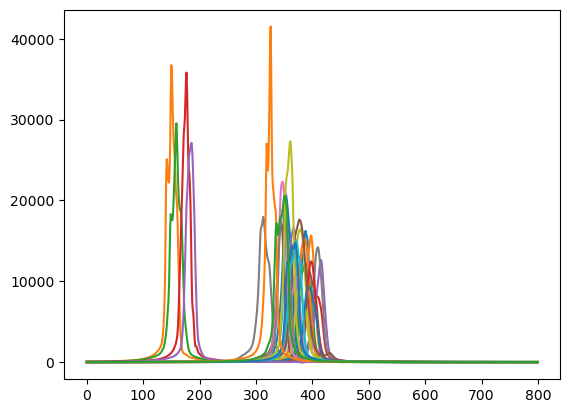

In [60]:
## Create  some variables for interference signals

## Variables for single peak water signals
# Initialize some list variables
w1f = []
for filename in os.listdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/WaterSignals_FFTPhaseRefdBasec_Smooth"):
    if filename.startswith("D") == True:
        w1f.append(filename)       
## Getting the directory
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/WaterSignals_FFTPhaseRefdBasec_Smooth")
# Initialize some list variables
w1 = []
w1d = []
# Read and append to list all FIDs and lipid profile values from data generation.
for i in np.arange(len(w1f)):
    wd,w = ng.pipe.read(w1f[i])
    w1d.append(wd)
    w1.append(w[14000:28000].real)
w1 = np.array(w1)
for i in np.arange(33):
    plt.plot(w1[i][2900:3700])

In [79]:
## Load Liver Data

os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT")

max_shift = 10

testFiles = ['NGR_Liver_Lipids_1__proton-1-3.fid', 'NGR_Liver_Lipid_2_PROTON-1-3.fid', 'NGR_Liver_Lipids_3__proton-1-3.fid', 'NGR_Liver_Lipid_4_second__proton-1-3.fid','NGR_Liver_Lipid_5__PROTON-4-3.fid', 'NGR_Liver_Lipids_17__proton-1-3.fid','NGR_Liver_Lipids_18_PROTON-1-3.fid','NGR_Liver_Lipid_19_PROTON-1-3.fid','NGR_Liver_Lipid_21_second_half__proton-1-3.fid','NGR_Liver_Lipids_22_proton-1-3.fid','NGR_Liver_Lipids_23_PROTON-1-3.fid','NGR_Liver_Lipid_24_4th_half__proton-1-3.fid','NGR_Liver_25_Lipids___proton-1-3.fid','NGR_Liver_Lipids_36_PROTON-1-3.fid','NGR_Liver_Lipids_37_PROTON-2-3.fid','NGR_Liver_Lipids_39__proton-1-3.fid']
        
testFlist = []
for i in testFiles:
    testFlist.append(i[4:19])
    
testFlist = testFlist[:32]

LiverDic = []
LiverData = []
for i in range(len(testFlist)):
    globals()[testFlist[i]+ '_' + 'Dic'],globals()[testFlist[i]+ '_' + 'Data'] = ng.pipe.read(testFiles[i])
    LiverDic.append(globals()[testFlist[i]+ '_' + 'Dic'])
    LiverData.append(globals()[testFlist[i]+ '_' + 'Data'])
    
    
for i in np.arange(16):
    LiverDic[i],LiverData[i] = ng.process.pipe_proc.ft(LiverDic[i],LiverData[i])
    
for i in np.arange(16):
    LiverData[i] = LiverData[i].real
    
for i in np.arange(16):
    LiverData[i] = np.reshape(LiverData[i], (32768,1))

    
#for i in np.arange(16):
#    LiverData[i] = LiverData[i]/OvMax
    
    

    
#os.chdir("/home/htjhnson/Downloads")
#LiverCRAFT1 = pd.read_excel('Liver_AdLib_AllData_half_reodered_adj.xlsx', index_col=0)
#LipListCRAFT = ['Tg','TC','TFA','PUFA','MUFA','SFA','UFA','Om3','LA','PC','PE','SM','PUFAp','MUFAp','SFAp']

LiverData = np.array(LiverData)[:,14000:28000]

In [98]:


spec = []
conc = []
iterations = 55000

## Generate data 
for i in range(iterations):
    
    random.seed(i+10000)
    linebroad = random.choice([0,1,2,3,4,5])

    #next 2 trilin.
    random.seed(i+1000)
    _data2 = data[linebroad][1]
    _data2 = ng.process.proc_base.cs(_data2,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+0)
    x2_int2 = random.uniform(0.1,2)
    random.seed(i+1)
    x2_int = random.randint(0,1)
    x2_data2  = x2_int*_data2*x2_int2
    y2_data2 = x2_int*dataprof2*x2_int2
        
    random.seed(i+1001)
    _data3 = data[linebroad][2]
    _data3 = ng.process.proc_base.cs(_data3,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+2)    
    x3_int2 = random.uniform(0.1,2)
    random.seed(i+3)
    x3_int = random.randint(0,1)
    x3_data3  = x3_int*_data3*x3_int2
    y3_data3 = x3_int*dataprof3*x3_int2
    

    #Next 2 dipalmPE
    random.seed(i+1003)
    _data5 = data[linebroad][4]
    _data5 = ng.process.proc_base.cs(_data5,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+6)
    x5_int2 = random.uniform(0.1,0.25)
    random.seed(i+7)
    x5_int = random.randint(0,1)
    x5_data5  = x5_int*_data5*x5_int2
    y5_data5 = x5_int*dataprof5*x5_int2
    
    random.seed(i+1004)
    _data6 = data[linebroad][5]
    _data6 = ng.process.proc_base.cs(_data6,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+8)
    x6_int2 = random.uniform(0.1,0.25)
    random.seed(i+9)
    x6_int = random.randint(0,1)
    x6_data6  = x6_int*_data6*x6_int2
    y6_data6 = x6_int*dataprof6*x6_int2
    _data6 = ng.process.proc_base.ifft(_data6)


    #Next two triDHA
    random.seed(i+1007)
    _data9 = data[linebroad][8]
    _data9 = ng.process.proc_base.cs(_data9,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+14)
    x9_int2 = random.uniform(0.1,0.5)
    random.seed(i+15)
    x9_int = random.randint(0,1)
    x9_data9  = x9_int*_data9*x9_int2
    y9_data9 = x9_int*dataprof9*x9_int2

    random.seed(i+1008)
    _data10 = data[linebroad][9]
    _data10 = ng.process.proc_base.cs(_data10,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+16)
    x10_int2 = random.uniform(0.1,0.5)
    random.seed(i+17)
    x10_int = random.randint(0,1)
    x10_data10  = x10_int*_data10*x10_int2
    y10_data10 = x10_int*dataprof10*x10_int2
    

    #Next two dipalmPC
    random.seed(i+1009)
    _data11 = data[linebroad][10]
    _data11 = ng.process.proc_base.cs(_data11,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+18)
    x11_int2 = random.uniform(0.1,0.4)
    random.seed(i+19)
    x11_int = random.randint(0,1)
    x11_data11  = x11_int*_data11*x11_int2
    y11_data11 = x11_int*dataprof11*x11_int2
    
    random.seed(i+1010)
    _data12 = data[linebroad][11]
    _data12 = ng.process.proc_base.cs(_data12,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+20)
    x12_int2 = random.uniform(0.1,0.4)
    random.seed(i+21)
    x12_int = random.randint(0,1)
    x12_data12  = x12_int*_data12*x12_int2
    y12_data12 = x12_int*dataprof12*x12_int2
    
    #Next two EPAm
    random.seed(i+1011)
    _data13 = data[linebroad][12]
    _data13 = ng.process.proc_base.cs(_data13,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+22)
    x13_int2 = random.uniform(0.1,0.5)
    random.seed(i+23)
    x13_int = random.randint(0,1)
    x13_data13  = x13_int*_data13*x13_int2
    y13_data13 = x13_int*dataprof13*x13_int2
    
    random.seed(i+1012)
    _data14 = data[linebroad][13]
    _data14 = ng.process.proc_base.cs(_data14,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+24)
    x14_int2 = random.uniform(0.1,0.5)
    random.seed(i+25)
    x14_int = random.randint(0,1)
    x14_data14  = x14_int*_data14*x14_int2
    y14_data14 = x14_int*dataprof14*x14_int2
    
    #Next 2 sphingomyelin
    random.seed(i+1013)
    _data15 = data[linebroad][14]
    _data15 = ng.process.proc_base.cs(_data15,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+26)
    x15_int2 = random.uniform(0.1,0.3)
    random.seed(i+27)
    x15_int = random.randint(0,1)
    x15_data15  = x15_int*_data15*x15_int2
    y15_data15 = x15_int*dataprof15*x15_int2
    
    random.seed(i+1014)
    _data16 = data[linebroad][15]
    _data16 = ng.process.proc_base.cs(_data16,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+28)
    x16_int2 = random.uniform(0.1,0.3)
    random.seed(i+29)
    x16_int = random.randint(0,1)
    x16_data16  = x16_int*_data16*x16_int2
    y16_data16 = x16_int*dataprof16*x16_int2

    
    #Next two triolein
    random.seed(i+1016)
    _data18 = data[linebroad][17]
    _data18 = ng.process.proc_base.cs(_data18,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+32)
    x18_int2 = random.uniform(0.1,3)
    random.seed(i+33)
    x18_int = random.randint(0,1)
    x18_data18  = x18_int*_data18*x18_int2
    y18_data18 = x18_int*dataprof18*x18_int2
    
    random.seed(i+1017)
    _data19 = data[linebroad][18]
    _data19 = ng.process.proc_base.cs(_data19,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+34)
    x19_int2 = random.uniform(0.1,3)
    random.seed(i+35)
    x19_int = random.randint(0,1)
    x19_data19  = x19_int*_data19*x19_int2
    y19_data19 = x19_int*dataprof19*x19_int2
    
    #Next 2 all LPC
    random.seed(i+1018)
    _data20 = data[linebroad][19]
    _data20 = ng.process.proc_base.cs(_data20,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+36)
    x20_int2 = random.uniform(0.05,0.4)
    random.seed(i+37)
    x20_int = random.randint(0,1)
    x20_data20  = x20_int*_data20*x20_int2
    y20_data20 = x20_int*dataprof20*x20_int2
    
    random.seed(i+1019)
    _data21 = data[linebroad][20]
    _data21 = ng.process.proc_base.cs(_data21,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+38)
    x21_int2 = random.uniform(0.05,0.4)
    random.seed(i+39)
    x21_int = random.randint(0,1)
    x21_data21  = x21_int*_data21*x21_int2
    y21_data21 = x21_int*dataprof21*x21_int2

    
    #Next two Tripalm
    random.seed(i+1021)
    _data23 = data[linebroad][22]
    _data23 = ng.process.proc_base.cs(_data23,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+42)
    x23_int2 = random.uniform(0.1,3)
    random.seed(i+43)
    x23_int = random.randint(0,1)
    x23_data23  = x23_int*_data23*x23_int2
    y23_data23 = x23_int*dataprof23*x23_int2
    
    random.seed(i+1022)
    _data24 = data[linebroad][23]
    _data24 = ng.process.proc_base.cs(_data24,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+44)
    x24_int2 = random.uniform(0.1,3)
    random.seed(i+45)
    x24_int = random.randint(0,1)
    x24_data24  = x24_int*_data24*x24_int2
    y24_data24 = x24_int*dataprof24*x24_int2
    
    #next 2 cholesteryl arachidonate
    random.seed(i+1023)
    _data25 = data[linebroad][24]
    _data25 = ng.process.proc_base.cs(_data25,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+46)
    x25_int2 = random.uniform(0.1,0.5)
    random.seed(i+47)
    x25_int = random.randint(0,1)
    x25_data25  = x25_int*_data25*x25_int2
    y25_data25 = x25_int*dataprof25*x25_int2
    
    random.seed(i+1024)
    _data26 = data[linebroad][25]
    _data26 = ng.process.proc_base.cs(_data26,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+48)
    x26_int2 = random.uniform(0.1,0.5)
    random.seed(i+49)
    x26_int = random.randint(0,1)
    x26_data26  = x26_int*_data26*x26_int2
    y26_data26 = x26_int*dataprof26*x26_int2

    #Next two dimyristPE
    random.seed(i+1026)
    _data28 = data[linebroad][27]
    _data28 = ng.process.proc_base.cs(_data28,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+52)
    x28_int2 = random.uniform(0.1,0.25)
    random.seed(i+53)
    x28_int = random.randint(0,1)
    x28_data28  = x28_int*_data28*x28_int2
    y28_data28 = x28_int*dataprof28*x28_int2
    
    random.seed(i+1027)
    _data29 = data[linebroad][28]
    _data29 = ng.process.proc_base.cs(_data29,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+54)
    x29_int2 = random.uniform(0.1,0.25)
    random.seed(i+55)
    x29_int = random.randint(0,1)
    x29_data29  = x29_int*_data29*x29_int2
    y29_data29 = x29_int*dataprof29*x29_int2


    #next two cholesteryl linoleate
    random.seed(i+1028)
    _data30 = data[linebroad][29]
    _data30 = ng.process.proc_base.cs(_data30,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+56)
    x30_int2 = random.uniform(0.1,0.5)
    random.seed(i+57)
    x30_int = random.randint(0,1)
    x30_data30  = x30_int*_data30*x30_int2
    y30_data30 = x30_int*dataprof30*x30_int2
    
    random.seed(i+1029)
    _data31 = data[linebroad][30]
    _data31 = ng.process.proc_base.cs(_data31,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+58)
    x31_int2 = random.uniform(0.1,0.5)
    random.seed(i+59)
    x31_int = random.randint(0,1)
    x31_data31  = x31_int*_data31*x31_int2
    y31_data31 = x31_int*dataprof31*x31_int2
    
    #next two cholesterol
    random.seed(i+1030)
    _data32 = data[linebroad][31]
    _data32 = ng.process.proc_base.cs(_data32,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+60)
    x32_int2 = random.uniform(0.1,0.5)
    random.seed(i+61)
    x32_int = random.randint(0,1)
    x32_data32  = x32_int*_data32*x32_int2
    y32_data32 = x32_int*dataprof32*x32_int2
    
    random.seed(i+1031)
    _data33 = data[linebroad][32]
    _data33 = ng.process.proc_base.cs(_data33,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+62)
    x33_int2 = random.uniform(0.1,0.5)
    random.seed(i+63)
    x33_int = random.randint(0,1)
    x33_data33  = x33_int*_data33*x33_int2
    y33_data33 = x33_int*dataprof33*x33_int2
    
    ##Next 2 dioleoylPC
    random.seed(i+1032)
    _data34 = data[linebroad][33]
    _data34 = ng.process.proc_base.cs(_data34,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+64)
    x34_int2 = random.uniform(0.1,0.4)
    random.seed(i+65)
    x34_int = random.randint(0,1)
    x34_data34  = x34_int*_data34*x34_int2
    y34_data34 = x34_int*dataprof34*x34_int2
    
    random.seed(i+1033)
    _data35 = data[linebroad][34]
    _data35 = ng.process.proc_base.cs(_data35,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+66)
    x35_int2 = random.uniform(0.1,0.4)
    random.seed(i+67)
    x35_int = random.randint(0,1)
    x35_data35  = x35_int*_data35*x35_int2
    y35_data35 = x35_int*dataprof35*x35_int2
    
    ##Next 2 palmitic acid
    random.seed(i+1034)
    _data36 = data[linebroad][35]
    _data36 = ng.process.proc_base.cs(_data36,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+68)
    x36_int2 = random.uniform(0.1,0.4)
    random.seed(i+69)
    x36_int = random.randint(0,1)
    x36_data36  = x36_int*_data36*x36_int2
    y36_data36 = x36_int*dataprof36*x36_int2
    
    random.seed(i+1035)
    _data37 = data[linebroad][36]
    _data37 = ng.process.proc_base.cs(_data37,random.choice([0,random.uniform(-1,1)*max_shift]))
    random.seed(i+70)
    x37_int2 = random.uniform(0.1,0.4)
    random.seed(i+71)
    x37_int = random.randint(0,1)
    x37_data37  = x37_int*_data37*x37_int2
    y37_data37 = x37_int*dataprof37*x37_int2
    
    
    
    ## Now process the DMSO2 reference as well
    _data1 = data[linebroad][0]

 
    xdata = _data1+x2_data2+x3_data3+x5_data5+x6_data6+x9_data9+x10_data10+x11_data11+x12_data12+x13_data13+x14_data14+x15_data15+x16_data16+x18_data18+x19_data19+x20_data20+x21_data21+x23_data23+x24_data24+x25_data25+x26_data26+x28_data28+x29_data29+x30_data30+x31_data31+x32_data32+x33_data33+x34_data34+x35_data35+x36_data36+x37_data37
    ydata = y2_data2+y3_data3+y5_data5+y6_data6+y9_data9+y10_data10+y11_data11+y12_data12+y13_data13+y14_data14+y15_data15+y16_data16+y18_data18+y19_data19+y20_data20+y21_data21+y23_data23+y24_data24+y25_data25+y26_data26+y28_data28+y29_data29+y30_data30+y31_data31+y32_data32+y33_data33+y34_data34+y35_data35+y36_data36+y37_data37

    
    ## Add random levels of noise.
    np.random.seed(i+670)
    random.seed(i+670)
    r = random.uniform(0.1,2)
    random.seed(i+6770700)
    r = random.choice([0,r])
    xdata = xdata + np.random.uniform(low=-10*r,high=10*r,size=14000)
    

    ## Now define and add interference signals
    
    # TMS
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+90800)
    r1 = random.choice(np.arange(11))
    random.seed(i+2098765)
    scale1 = random.uniform(0.01,2)
    TMS = LiverData[r1].copy()*scale1
    TMS[:13350] = np.zeros([13350,1])
    TMS[13525:] = np.zeros([475,1])
    TMS = np.reshape(TMS,[14000])
    # Randomly do or do not add TMS signal
    random.seed(i+3543)
    TMS = random.choice([np.zeros(14000),TMS])
    xdata = xdata + TMS

    
    # Water
    # Pick either presat signal (i.e. don't add any signal) or signal with one or two water peaks (from either lipid standards or hepatic spectra, respectively)
    # Define a scalar for the water region
    random.seed(i+3098765)
    scale2 = random.uniform(0.01,2)
    # First pick one of the double peak signals from a hepatic spectra
    random.seed(i+4101025)
    r2 = random.choice(np.arange(16))
    Water = LiverData[r2].copy()
    #Water[:2900] = np.zeros([2900,1])
    #Water[3700:] = np.zeros([10300,1])
    Water = np.reshape(Water,[14000])*scale2
    # Second pick one of the single peak water signals
    random.seed(i+8372)
    r3 = random.choice(np.arange(33))
    Water2 = w1[r3]*scale2
    #Water2[:2900] = np.zeros([2900])
    #Water2[3700:] = np.zeros([10300])
    # Now pick only one of the three above scenarios to be the water region in the synthetic spectra
    random.seed(i+43526)
    xdata[2900:3700] = random.choice([xdata[2900:3700],Water[2900:3700]+np.random.uniform(low=-10*r,high=10*r,size=800),Water2[2900:3700]+np.random.uniform(low=-10*r,high=10*r,size=800)])
    
    
    # MTBE
    # Isolate MTBE signal from one hepatic spectra
    random.seed(i+572803)
    r4 = random.choice(np.arange(16))
    random.seed(i+30988765)
    scale3 = random.uniform(0.01,2)
    MTBE = LiverData[r4].copy()*scale3
    MTBE[:6355] = np.zeros([6355,1])
    MTBE[6385:10775] = np.zeros([10775-6385,1])
    MTBE[10800:] = np.zeros([3200,1])
    MTBE = np.reshape(MTBE,[14000])
    # Randomly do or do not add MTBE signal
    random.seed(i+5535473)
    MTBE = random.choice([np.zeros(14000),MTBE])
    xdata = xdata + MTBE
    
    
    # TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+5690800)
    r5 = random.choice(np.arange(11))
    random.seed(i+2111800)
    scale4 = random.uniform(0.1,2)
    TMS1 = LiverData[r5].copy()*scale4
    TMS1[:13350] = np.zeros([13350,1])
    TMS1[13525:] = np.zeros([475,1])
    TMS1 = np.reshape(TMS1,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t1 = np.zeros(14000)
    t1[rand:rand+175] = TMS[13350:13525]
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t2 = random.choice([np.zeros(14000),t1])
    xdata = xdata + t2
    
    
     # Second TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+100800)
    r = random.choice(np.arange(11))
    random.seed(i+2520800)
    scale5 = random.uniform(0.1,2)
    TMS2 = LiverData[r].copy()*scale5
    TMS2[:13350] = np.zeros([13350,1])
    TMS2[13525:] = np.zeros([475,1])
    TMS2 = np.reshape(TMS2,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t3 = np.zeros(14000)
    t3[rand:rand+175] = TMS[13350:13525]
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t4 = random.choice([np.zeros(14000),t3])
    xdata = xdata + t4
    
    
     # Third TMS signal added in random place in spectra, essentially a random interference signal
    # Isolate TMS signal from one hepatic spectra
    random.seed(i+86800)
    r = random.choice(np.arange(11))
    random.seed(i+25208070)
    scale6 = random.uniform(0.1,2)
    TMS3 = LiverData[r].copy()*scale6
    TMS3[:13350] = np.zeros([13350,1])
    TMS3[13525:] = np.zeros([475,1])
    TMS3 = np.reshape(TMS3,[14000])
    # Define interference signal
    random.seed(i+234234)
    rand = random.choice(np.arange(13825))
    t5 = np.zeros(14000)
    t5[rand:rand+175] = TMS3[13350:13525]
    # Randomly do or do not add random interfering signal
    random.seed(i+35473)
    t6 = random.choice([np.zeros(14000),t5])
    xdata = xdata + t6
    
    ## Add random baseline variations (just shifting entire spectrum up or down)
    random.seed(i+800)
    xdata = xdata + random.uniform(-0.01,0.01)

    spec.append(xdata)
    conc.append(ydata)
    
    
## Determine max value in entire dataset, and use this value to normalize dataset intensities.
OvMaxL = []
for i in spec:
    OvMaxL.append(np.max(i))
OvMax = np.max(OvMaxL)
print(OvMax)

spec = spec/OvMax



## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
conc = np.array(conc)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)
conc = np.delete(conc,7, 1)



# Save each array
# Switch to folder where datasets will be saved
os.chdir('/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
np.save("LipidTrainTestVal_Spectra", spec) #save spectra
np.save("LipidTrainTestVal_Spectra_Concentrations", conc) #save concentrations

96027.31863988085


NameError: name 'spectraVal_Clean' is not defined

In [7]:
#OvMax = 96027.31863988085

In [10]:
## 
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra/DatasetsWithoutBaseCorrection/FFTPhaseRefd2pt4lwIFFT")


#
Tdic1,Tdata1 = ng.pipe.read('DL_LipMix4_1_PROTON-2-3.fid')
Tdic2,Tdata2 = ng.pipe.read('DL_LipMix4_2_PROTON-2-3.fid')
Tdic3,Tdata3 = ng.pipe.read('DL_LipMix4_3_PROTON-3-3.fid')
Tdic4,Tdata4 = ng.pipe.read('DL_LipMix5_1_PROTON-3-3.fid')
Tdic5,Tdata5 = ng.pipe.read('DL_LipMix5_2_PROTON-3-3.fid')
Tdic6,Tdata6 = ng.pipe.read('DL_LipMix5_3_PROTON-3-3.fid')
#Tdic7,Tdata7 = ng.pipe.read('DL_LipMix_7-1_PROTON-2-3.fid')
#Tdic8,Tdata8 = ng.pipe.read('DL_LipMix_7-2_PROTON-2-3.fid')
Tdic9,Tdata9 = ng.pipe.read('DL_LipMix_7-3_PROTON-1-3.fid')
Tdic10,Tdata10 = ng.pipe.read('DL_LipMix_8-1_PROTON-2-3.fid')
#Tdic11,Tdata11 = ng.pipe.read('DL_LipMix_8-2_PROTON-2-3.fid')
#os.chdir("/home/htjhnson/Downloads")
Tdic12,Tdata12 = ng.pipe.read('DL_LipMixture_1_PROTON-2-3.fid')
Tdic13,Tdata13 = ng.pipe.read('DL_LipMixture_2_PROTON-2-3.fid')
Tdic14,Tdata14 = ng.pipe.read('DL_LipMixture_3_PROTON-2-3.fid')

#
Tdic1,Tdata1 = ng.process.pipe_proc.ft(Tdic1,Tdata1)
Tdic2,Tdata2 = ng.process.pipe_proc.ft(Tdic2,Tdata2)
Tdic3,Tdata3 = ng.process.pipe_proc.ft(Tdic3,Tdata3)
Tdic4,Tdata4 = ng.process.pipe_proc.ft(Tdic4,Tdata4)
Tdic5,Tdata5 = ng.process.pipe_proc.ft(Tdic5,Tdata5)
Tdic6,Tdata6 = ng.process.pipe_proc.ft(Tdic6,Tdata6)
#Tdic7,Tdata7 = ng.process.pipe_proc.ft(Tdic7,Tdata7)
#Tdic8,Tdata8 = ng.process.pipe_proc.ft(Tdic8,Tdata8)
Tdic9,Tdata9 = ng.process.pipe_proc.ft(Tdic9,Tdata9)
Tdic10,Tdata10 = ng.process.pipe_proc.ft(Tdic10,Tdata10)
Tdic12,Tdata12 = ng.process.pipe_proc.ft(Tdic12,Tdata12)
Tdic13,Tdata13 = ng.process.pipe_proc.ft(Tdic13,Tdata13)
Tdic14,Tdata14 = ng.process.pipe_proc.ft(Tdic14,Tdata14)


#
test1 = Tdata1.real
test2 = Tdata2.real
test3 = Tdata3.real
test4 = Tdata4.real
test5 = Tdata5.real
test6 = Tdata6.real
#test7 = Tdata7.real
#test8 = Tdata8.real
test9 = Tdata9.real
test10 = Tdata10.real
#test11 = Tdata11.real
test12 = Tdata12.real
test13 = Tdata13.real
test14 = Tdata14.real

#
test1 = np.reshape(test1,(32768,1))
test2 = np.reshape(test2,(32768,1))
test3 = np.reshape(test3,(32768,1))
test4 = np.reshape(test4,(32768,1))
test5 = np.reshape(test5,(32768,1))
test6 = np.reshape(test6,(32768,1))
#test7 = np.reshape(test7,(32768,1))
#test8 = np.reshape(test8,(32768,1))
test9 = np.reshape(test9,(32768,1))
test10 = np.reshape(test10,(32768,1))
#test11 = np.reshape(test11,(32768,1))
test12 = np.reshape(test12,(32768,1))
test13 = np.reshape(test13,(32768,1))
test14 = np.reshape(test14,(32768,1))

#
test = np.array([test1,test2,test3,test4,test5,test6,test9,test10,test12,test13,test14])/OvMax
test_sc = test[:,14000:28000]



# Save each experimental mixture spectra array
os.chdir("/home/htjhnson/Desktop/XAI-Uncertainty/LipidSpectra")
TestLipProfiles = pd.read_excel('DL_LipMix_LipidProfiles_More.xlsx', index_col=0)
TestLipProfiles = np.array(TestLipProfiles)
## Delete UFA, MUFA%, PUFA%, and SFA% from the generated dataset.
TestLipProfiles = np.array(TestLipProfiles)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)
TestLipProfiles = np.delete(TestLipProfiles,7, 1)

os.chdir('/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
#os.chdir('/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
np.save("ExperimentalLipidMixture_Spectra", test_sc) #save spectra
np.save("ExperimentalLipidMixture_Conc", TestLipProfiles) #save spectra



# Scale and save liver lipid spectra array
# Switch to folder where datasets will be saved
os.chdir('//home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
#os.chdir('/net/clusterhn.cluster.com/home/htjhnson/Desktop/XAI-Uncertainty/GeneratedDataAndVariables')
np.save("LiverLipid_Spectra", LiverData/OvMax) #save spectra

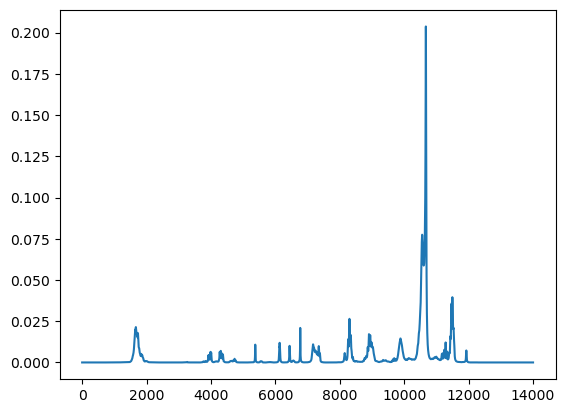

In [14]:
plt.plot(test_sc[2])